<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana10/MinimosGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana10/')
!ls

Data			MinimosGradienteLevenberg–Marquardt.ipynb
MinimosGradiente.ipynb	NewtonRaphson.ipynb


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sympy as sym
import time

In [9]:
data = np.loadtxt('Data/MinimosLineal.txt')
x_data, y_data = data[:, 0], data[:, 1]

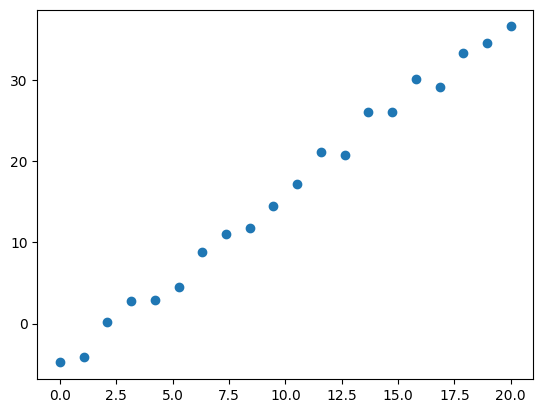

In [10]:
plt.scatter(x_data,y_data)

In [11]:
def Model(p,x):

  y = 0.
  for i in range(len(p)):
    y += p[i]*x**i

  return y

In [45]:
_x = sym.Symbol('x',real=True)
p = np.array([-2,2])
Model(p,_x)

2*x - 2.0

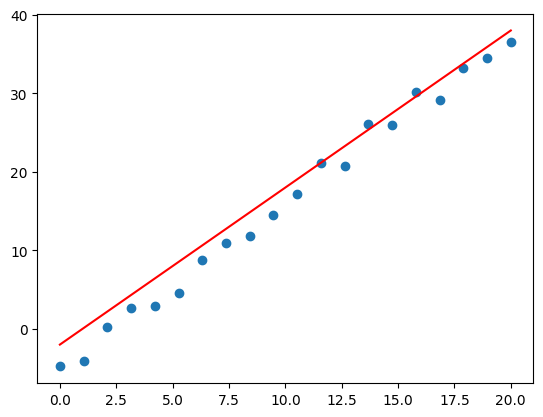

In [46]:
_t  =np.linspace(min(x_data),max(x_data),10)
plt.scatter(x_data,y_data) # Hume world
plt.plot(_t,Model(p,_t),color='r') # kant world

In [47]:
def Plotter(e):

  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(221)
  ax1 = fig.add_subplot(222)
  ax2 = fig.add_subplot(223)

  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax,ax1,ax2

In [48]:
# Generamos el vector
def GetF(p):
  return np.array([ y_data[i] - Model(p, x_data[i]) for i in range(len(x_data)) ])

In [49]:
GetF(p)

array([-2.786585 , -4.171134 , -2.0308766, -1.595983 , -3.542529 ,
       -3.99889  , -1.803844 , -1.759622 , -3.042666 , -2.418058 ,
       -1.82801  , -0.0598   , -2.47207  ,  0.71176  , -1.47066  ,
        0.56639  , -2.54175  , -0.50514  , -1.3895   , -1.43738  ])

In [50]:
def Jacobiano(p, x_data):

    n = len(p)
    N = len(x_data)
    J = np.zeros((N, n))

    for j in range(n):
        J[:, j] = -x_data**j  # primer columna: -1, luego -x, luego -x^2, etc.
    return J

In [52]:
J = Jacobiano(p,x_data)
#J

In [53]:
J.T @ GetF(p)

array([ 37.5763476 , 283.63110037])

In [54]:
def Metric(p):
  return 0.5*np.linalg.norm(GetF(p))

In [55]:
Metric(p)

np.float64(5.1232219194023445)

In [62]:
def Minimizer(p,lr=1e-4,epochs=int(1e5),error=1e-3):

  metric = 1
  it = 0

  M = np.array([])
  history = np.array([p])

  while metric > error and it < epochs:

    M = np.append(M,Metric(p))

    J = Jacobiano(p,x_data)
    Vector = GetF(p)

    # Algoritmo

    p = p - lr*np.dot(J.T,Vector)

    history = np.vstack((history,p))

    metric = Metric(p)

    if it % 100 == 0:
      clear_output(wait=True)
      _,ax,ax1,ax2 = Plotter(it)
      ax.plot(history[:it])
      ax.legend(['$u_{}$: {:.8}'.format(i, p[i]) for i in range(len(p))])
      ax1.plot(M[:it],color='k',label='Metric {:.3f}'.format(M[-1]))
      ax1.legend()

      ax2.scatter(x_data,y_data)
      _t = np.linspace(np.min(x_data),np.max(x_data),100)
      ax2.plot(_t,Model(p,_t),color='r',label='Model')
      ax2.legend()
      plt.show()

      time.sleep(0.01)

    it += 1


  return p

In [63]:
p0 = np.array([-5.,100.])
xsol = Minimizer(p0)

KeyboardInterrupt: 

In [ ]:
xsol

array([1.77145834, 1.77344981])

In [ ]:
GetF(G1,xsol)

array([ 3.84497757e-07, -1.98948755e-03])